In [120]:
version = "v1.13.122220"

# Assignment 2: Regression and Classification

In this assignment we will build several regression and classification models and learn how model complexity relates to generalization performance. 

**Before starting Question 1, we recommend you read through *all* the questions in the assignment to get a better idea of the overall narrative for what we're exploring. The output of some questions is used in subsequent questions.**

We're going to look at a very common situation in machine learning where:

1. We assume the data are drawn from some true underlying 'gold standard' model that we *can't* observe directly, but that we would like to estimate, since if we know the 'true' model we could in theory do perfect prediction for future examples. In this assignment, the true model will be a polynomial function, but again, we can't observe the exact function.

2. We have our actual dataset, which is drawn from a noisy version of the 'gold standard' function that we *do* observe directly.  This dataset is all we have, and we don't have any information about the added noise. As with any standard machine learning setup, we can divide this dataset into training and test sets: fitting the model using the training points, and evaluating the resulting model on the test points. There's code below that plots the training and test points explicitly.

By using regression on #2, we try to get at #1. We'll see that by making different assumptions about the nature of the underlying true model, we will get different flavors of regression, which in turn will lead to better or worse fits -- according to how well our assumptions match the actual true model. The most basic assumption in Question 1 is that the true underlying model *is* a polynomial, but of unknown degree. Later, we assume not only that the true underlying model is a polynomial, but that it has sparse coefficients (Lasso) and you'll evaluate the model fit in that case as well.


First, run the following cell to generate and plot the data points we will use throughout the assignment. 

The independent variable $x$ consists of $n$ evenly spaced points from the interval $[0, 20]$ and the dependent variable $y = 0.05x^3 - x^2 - x + C \epsilon$ is a function of $x$ where $\epsilon \sim \mathcal{N}(0, 1)$ represents the standard Gaussian noise and $C$ is a constant indicating the noise magnitude.

In [121]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)
C = 15
n = 60
x = np.linspace(0, 20, n)  # x is drawn from a fixed range
y = x ** 3 / 20 - x ** 2 - x + C * np.random.randn(n)

x = x.reshape(-1, 1) # convert x and y from simple array to a 1-column matrix for input to sklearn regression 
y = y.reshape(-1, 1)

# Create the training and testing sets and their targets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [122]:
print(x.shape, y.shape)

(60, 1) (60, 1)


In [123]:
print(X_train.shape, y_train.shape)

(45, 1) (45, 1)


In [124]:
print(X_test.shape, y_test.shape)

(15, 1) (15, 1)


In [125]:
X_train

array([[14.57627119],
       [16.61016949],
       [ 2.37288136],
       [ 4.74576271],
       [10.84745763],
       [16.94915254],
       [ 9.83050847],
       [14.23728814],
       [18.30508475],
       [ 6.10169492],
       [18.98305085],
       [ 9.15254237],
       [ 5.08474576],
       [ 1.69491525],
       [10.50847458],
       [ 5.42372881],
       [17.28813559],
       [ 6.77966102],
       [17.62711864],
       [ 2.71186441],
       [ 4.40677966],
       [ 8.47457627],
       [12.54237288],
       [ 5.76271186],
       [15.25423729],
       [16.27118644],
       [19.3220339 ],
       [12.88135593],
       [ 0.33898305],
       [ 4.06779661],
       [15.59322034],
       [ 8.13559322],
       [ 2.03389831],
       [ 7.79661017],
       [12.20338983],
       [ 7.11864407],
       [ 6.44067797],
       [ 3.05084746],
       [13.22033898],
       [18.6440678 ],
       [ 1.01694915],
       [ 0.        ],
       [17.96610169],
       [15.93220339],
       [14.91525424]])

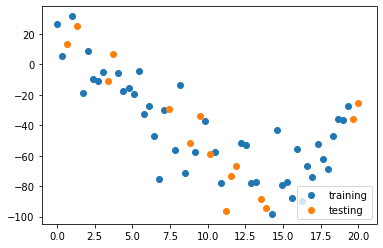

In [126]:
def data_scatter():
    """
    This function helps you visualize the training and testing sets by drawing a scatter plot of the data points.
    Feel free to change the function in any ways to create your own visuals. 
    """
    plt.figure()
    plt.scatter(X_train, y_train, label='training')
    plt.scatter(X_test, y_test, label='testing')
    plt.legend(loc=4)

# Remember to comment it out before submitting the notebook
data_scatter()

### Question 1. (15 pts)

From the data generation process we can see that a *linear* function is not sufficient to accurately describe the relationship between $x$ and $y$. What we really need is a *non-linear* regression that relates $x$ and $y$ in a non-linear way, which in our case we conjecture $y$ is a *polynomial* function of various degrees of $x$:

\begin{equation*}
y = a_{0} + a_{1}x + a_{2}x^{2} + \cdots + a_{n}x^{n}
\end{equation*}

where $a_{0}, a_{1}, \cdots, a_{n}$ are the coefficients we want to find. Notice that although $y$ is not a linear function of $x$, it is a linear function of powers of $x$. That means we can still run linear regression, but now on powers of $x$ instead of the zeroth and the first power of $x$ only. To do so we need to create these powers of $x$ out of the $x$ we have now, using the [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn-preprocessing-polynomialfeatures) class from `scikit-learn`. (We recommend you take a look at the polynomial regression examples in the textbook's Section 4.5, Interactions and Polynomials.)

For this question, proceed according to the following steps:

1. Write the code that fits a polynomial [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model on the *training data* `X_train` for degrees 1, 3, 7, 11 respectively. To do this, first use `PolynomialFeatures` to transform the original data so that it adds new additional polynomial features. Then, with this expanded feature set, fit a `LinearRegression` model for each degree choice (1, 3, 7, 11).


2. For each polynomial regression model you fit in the previous step, use the model to generate predictions for that polynomial's values, using as input 100 evenly spaced points on the interval [0, 20]. To do this, as input to the model, use the expression `np.linspace(0, 20, 100).reshape(-1, 1)` which gives a 1-column matrix with the desired x-values. Remember that you will first need to call `fit_transform` on this input to add the polynomial feature columns, and then pass that into the predict method on your trained linear regression model. Then convert the 100-row, single-column prediction output to a single row, 100-column array using transpose(). Then stack all the 1-row arrays to create the final prediction output in a single numpy array, whose the first row stores the predictions from the model of degree 1, the second row stores the predictions from the model of degree 3 and so on, and return this numpy array as your result. Among other uses later, the autograder will use these predictions to verify the results of your trained model-fitting.

*This function should return a numpy array of the shape `(4, 100)`.*

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


degs = (1, 3, 7, 11)  # this will be useful later





def answer_one():
    dimensions = np.linspace(0, 20, 100)
    predictions_list = []
    #First, we are going to transform the original data to add polynomial features 
    for i in degs:
        poly = PolynomialFeatures(degree=i, include_bias = True)
        X_train_b = poly.fit_transform(X_train.reshape(-1, 1))
        X_test_b = poly.fit_transform(dimensions.reshape(-1, 1))
        model = linear_model.LinearRegression()
        model.fit(X_train_b, y_train)
        predictions = model.predict(X_test_b)
        predictions_list.append(predictions)


    preds = np.array(predictions_list).reshape(-1,100)
    return preds
        
   
        


In [128]:
# Autograder tests

stu_ans = answer_one()

assert isinstance(stu_ans, np.ndarray), "Q1: Your function should return a np.ndarray. "
assert stu_ans.shape == (4, 100), "Q1: Your np.ndarray is of an incorrect shape. "

del stu_ans

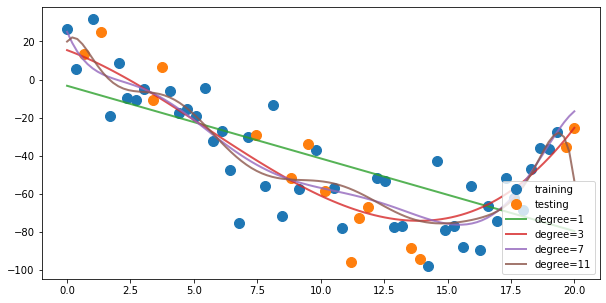

In [129]:
# Optional: Now let's plot the polynomials we learned from the training data, along with the training and the testing data
# Feel free to change this function in any way to create your own visuals. 
degs = (1, 3, 7, 11)
def plot_one(predictions):
    plt.figure(figsize=(10, 5))
    plt.plot(X_train, y_train, 'o', label='training', markersize=10)
    plt.plot(X_test, y_test, 'o', label='testing', markersize=10)
    for i, deg in enumerate(degs):
        plt.plot(np.linspace(0, 20, 100), predictions[i], alpha=0.8, lw=2, label=f"degree={deg}")
    plt.legend(loc=4)

# Remember to comment it out before submitting the notebook
plot_one(answer_one())

### Question 2. (15 pts)

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees = (1, 3, 7, 11). For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the testing data. 

*This function should return a tuple of lists `(r2_train, r2_test)`, where `r2_train` contains the $R^{2}$ scores on the training data and the other contains the $R^{2}$ scores on the testing data.*

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.regression import r2_score

degs = (1, 3, 7, 11)  # this will be useful later

def answer_two():
    train = []
    test = []
    for i in degs:
        poly = PolynomialFeatures(degree=i, include_bias = True)
        X_train_b = poly.fit_transform(X_train.reshape(-1,1))
        X_test_b = poly.fit_transform(X_test.reshape(-1,1))
        #poly.fit_transform(X_test)
        model = linear_model.LinearRegression()
        model.fit(X_train_b, y_train)
        train_score = model.score(X_train_b, y_train)
        test_score = model.score(X_test_b, y_test)
        train.append(train_score)
        test.append(test_score)

    r2_train, r2_test = train, test
    
   
    return r2_train, r2_test

In [131]:
# Autograder tests

stu_ans = answer_two()
assert isinstance(stu_ans, tuple), "Q2: Your function should return a tuple. "
assert len(stu_ans) == 2, "Q2: The tuple returned should be of length 2. "
assert isinstance(stu_ans[0], list) and isinstance(stu_ans[1], list), "Q2: The tuple should contain only lists. "

del stu_ans

### Question 3. (10 pts)  Using k-NN regression

Fit a k-NN regression model with the training data and return the $R^{2}$ value on the testing data. Use the default hyper-parameters. 

*This function should return a single `float` number.*

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

def answer_three():
    
    neigh = KNeighborsRegressor(n_neighbors=5, weights = 'uniform')
    neigh.fit(X_train, y_train)
    
    r2 = neigh.score(X_test, y_test)


    return r2

In [133]:
# Autograder tests

stu_ans = answer_three()

assert isinstance(stu_ans, float), "Q3: Your function should return a single float number. "

del stu_ans

### Question 4a.  (5 pts)

Based on the $R^2$ scores from Question 2, which degree of the polynomial causes the model to be
 - underfitting; 
 - overfitting; or
 - achieving good generalisation performance? 

Hint: Try to plot the degrees of the polynomial against the $R^2$ scores to visualise their relationship. 

Your function should return a 3-tuple with the degree values in this order: (Underfitting, Overfitting, Good_Generalization)
Some answers may have more than one value that will be accepted as correct.

In [134]:
def answer_four_a():
    
    result = (1,4,3)

    return result

In [135]:
# Autograder tests

stu_ans = answer_four_a()

assert isinstance(stu_ans, tuple), "Q4a: You should return a tuple."
assert len(stu_ans) == 3, "Q4a: Your tuple must have 3 elements."

del stu_ans

### Question 4b. (15 pts)  Using Lasso regression for polynomial fitting

Training models on high-degree polynomial features can result in overly complex models that overfit the training data, so we often add some regularization to constrain the model complexity as we saw in Ridge and Lasso regression.

For this question, you will be comparing the non-regularized `LinearRegression` model (with the default hyper-parameters) that you built for Question 1, to a new regularised Lasso Regression model (with hyper-parameters `alpha=0.01`, `max_iter=10000`) --- on polynomial features of varying degrees, so you can see the difference with the polynomials that were fit in Question 1.

Your function should return predictions for the regularized model using the same method and in the same format that you used for question 1: namely, you generate predictions for 100 evenly spaced points on the interval [0, 20] and store the results in a numpy array, whose the first row stores the predictions from the model of degree 1, the second row stores the predictions from the model of degree 3 and so on.

*This function should return a numpy array of the shape `(4, 100)`.*

Once you have successful generated these predictions, plot them using the provided function and compare with the polynomial fit in Question 1. What do you observe?  What explains what you observe?  (These questions are for your insight only - they are not graded.)

In [136]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics.regression import r2_score

degs = (1, 3, 7, 11)
def answer_four_b():
    dimensions = np.linspace(0, 20, 100)
    predictions_list = []
    #First, we are going to transform the original data to add polynomial features 
    for i in degs:
        poly = PolynomialFeatures(degree=i, include_bias = True)
        X_train_b = poly.fit_transform(X_train.reshape(-1, 1))
        X_test_b = poly.fit_transform(dimensions.reshape(-1, 1))
        model = linear_model.Lasso(alpha=0.01, max_iter=10000)
        model.fit(X_train_b, y_train)
        predictions = model.predict(X_test_b)
        predictions_list.append(predictions)


    preds = np.array(predictions_list).reshape(-1,100)
    return preds
        
   
    
    
    
    
    
    preds = []
    


    return preds

In [137]:
# Autograder tests

stu_ans = answer_four_b()

assert isinstance(stu_ans, np.ndarray), "Q4b: Your function should return a np.ndarray. "
assert stu_ans.shape == (4, 100), "Q4b: Your np.ndarray is of an incorrect shape: it should be (4, 100)."

del stu_ans

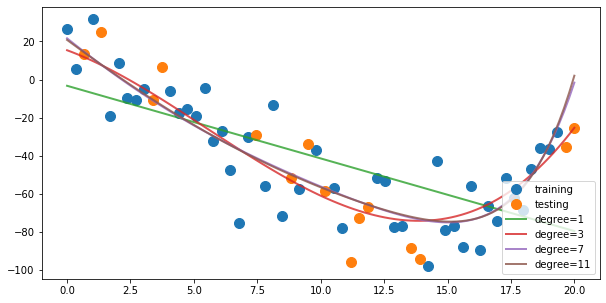

In [138]:
# Remember to comment it out before submitting the notebook
plot_one(answer_four_b())

### Question 4c. (20 points) 

Return the $R^2$ score for each of the Lasso models above relative to a new 'gold standard' test set generated from the true underlying cubic polynomial model without noise.  Compute this test set by computing the true noise-less underlying function `t^3/20 - t^2 - t` for each of 100 evenly spaced points on the interval [0, 20] (the same as you've used in previous questions).  For each degree (1, 3, 7, 11), compute the $R^2$ score using this 'gold standard' test set and return the polynomial degree that gives the best fit on the 'gold standard' test set. Your function should return an integer, which should be in the set (1,3,7,11).  Does the optimal polynomial degree match the true polynomial degree?

In [139]:
import itertools
degs = (1, 3, 7, 11)
def answer_four_c():
    best_poly = None
    dimensions = np.linspace(0, 20, 100)
    underlying_function = lambda t: t**3/20 - t**2 - t
    vectorized = np.vectorize(underlying_function)
    gold_standard = vectorized(dimensions)
    R2_list_test = []
    #First, we are going to transform the original data to add polynomial features 
    for i in degs:
        poly = PolynomialFeatures(degree=i, include_bias = True)
        X_train_b = poly.fit_transform(X_train.reshape(-1, 1))
        X_test_b = poly.fit_transform(dimensions.reshape(-1,1))
        model = linear_model.Lasso(alpha=0.01, max_iter=10000)
        model.fit(X_train_b, y_train)
        score = model.score(X_test_b, gold_standard)
        R2_list_test.append((score, i))
        R2_dict = dict( R2_list_test)
        R2_dict = dict((v,k) for k,v in  R2_dict.items())
        best_deg = max(R2_dict, key=R2_dict.get)
    

    


    return best_deg 
    

In [140]:
stu_ans = answer_four_c()

assert isinstance(stu_ans, int), "Q4c: Your function should return an integer. "
del stu_ans

### Question 5.  (15 points)  Applying a SVC classifier to the Wisconsin dataset

We're going to return to the Wisconsin breast cancer dataset to apply our newly learned Support Vector classifier  (`SVC`).

For this question, we're also going to use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for the Support Vector Classifier with varying parameter values.

Create an `SVC` with default parameters (i.e. `kernel='rbf', C=1`) and `random_state=0`. Recall that the kernel width of the RBF kernel is controlled using the `gamma` parameter.  Explore the effect of `gamma` on classifier accuracy by using the `validation_curve` function to find the training and test scores for 6 values of `gamma` from `1e-7` to `1e-2` (i.e. `np.logspace(-7, -2, 6, endpoint=True)`, or more precisely `[1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02]`).

For each level of `gamma`, set parameter `cv=3` so that `validation_curve` will fit 3 models on different subsets of the data, returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets. 

Find the mean score across the three models for each level of `gamma` for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

e.g.

if one of your array of scores is

    array([[ 0.5,  0.4,  0.6],
           [ 0.7,  0.8,  0.7],
           [ 0.9,  0.8,  0.8],
           [ 0.8,  0.7,  0.8],
           [ 0.7,  0.6,  0.6],
           [ 0.4,  0.6,  0.5]])
       
it should then become

    array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])

*This function should return a tuple of numpy arrays `(training_scores, test_scores)` where each array in the tuple has shape `(6,)`.*

Here's the preliminary code to load the dataset.

In [156]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

cancer = load_breast_cancer()

data      = np.hstack([cancer["data"], cancer["target"].reshape(-1, 1)])
col_names = np.hstack([cancer["feature_names"], ["target"]])
cancer_df = pd.DataFrame(data, columns=col_names)

X_cancer, y_cancer = cancer_df.iloc[:, :-1], cancer_df.iloc[:, -1]

In [157]:
def answer_five():
    
    param_range = np.logspace(-7, -2, 6, endpoint=True)
    
    train_scores, test_scores = validation_curve(
    SVC(), X_cancer, y_cancer, param_name="gamma", param_range=param_range, cv = 3)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    results = (train_scores_mean, test_scores_mean)
    
    

    
    
  
    return results

In [158]:
# Autograder tests

stu_ans = answer_five()

assert isinstance(stu_ans, tuple), "Q5: You should return a tuple (of two arrays)"
assert stu_ans[0].shape == (6, ), "Q5: Please check the shape of your first returned array: it should be (6,)."
assert stu_ans[1].shape == (6, ), "Q5: Please check the shape of your second returned array: it should be (6,)."

del stu_ans

### Question 6. (5 points)  

Based on the scores from the previous question, what gamma value corresponds to a model that is underfitting? What gamma value corresponds to a model that is overfitting? What choice of gamma would provide a model with good generalization performance on this dataset?

(Hint: Try plotting the scores from the previous question to visualize the relationship. Code is provided below.)

This function should return a tuple with the gamma values in this order: (Underfitting, Overfitting, Good_Generalization)
You must enter these values in the format 1e-N, where N is the exponent, and the gamma value must be one of the values in the list `[1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]`.  Some answers have more than one value that will be accepted as correct.

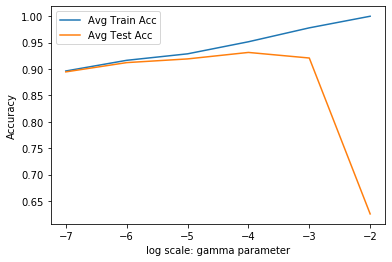

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
a, b = answer_five()

# Remember to comment it out before submitting the notebook
# uncomment to plot

x = np.arange(-7, -1, 1)
plt.figure()
plt.plot(x, answer_five()[0], label="Avg Train Acc")
plt.plot(x,  answer_five()[1], label="Avg Test Acc")
plt.xticks(x)
plt.xlabel('log scale: gamma parameter')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

def answer_six():
    result = (1e-7, 1e-2, 1e-4)

    return result
    

In [165]:
# Autograder tests

stu_ans = answer_six()

assert isinstance(stu_ans, tuple), "Q6: You should return a tuple."
assert len(stu_ans) == 3, "Q6: Your tuple must have 3 elements."

del stu_ans